# Histograms of the Big Five Traits in the entire dataset

## Import packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
random.seed(32)

## Import data

In [6]:
# read in normal dataset
df = pd.read_pickle("/home/sophia/ma_py/Big5-NLP/b5feat.pkl")
df.name = 'allfeatures_df'
df = df[df['trait', 'openness'].notna()]
df = df[df['trait', 'conscientiousness'].notna()]
df = df[df['trait', 'extraversion'].notna()]
df = df[df['trait', 'agreeableness'].notna()]
df = df[df['trait', 'neuroticism'].notna()]
df.name = 'allfeatures_df'
df.trait.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, -Areopagan- to zyzee
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agreeableness      1568 non-null   float32
 1   openness           1568 non-null   float32
 2   conscientiousness  1568 non-null   float32
 3   extraversion       1568 non-null   float32
 4   neuroticism        1568 non-null   float32
 5   big5_a             1568 non-null   int16  
 6   big5_o             1568 non-null   int16  
 7   big5_c             1568 non-null   int16  
 8   big5_e             1568 non-null   int16  
 9   big5_n             1568 non-null   int16  
 10  big5_a_multi       1568 non-null   int16  
 11  big5_o_multi       1568 non-null   int16  
 12  big5_c_multi       1568 non-null   int16  
 13  big5_e_multi       1568 non-null   int16  
 14  big5_n_multi       1568 non-null   int16  
dtypes: float32(5), int16(10)
memory usage: 73.5+ KB
<class 'pandas.cor

## Histogram

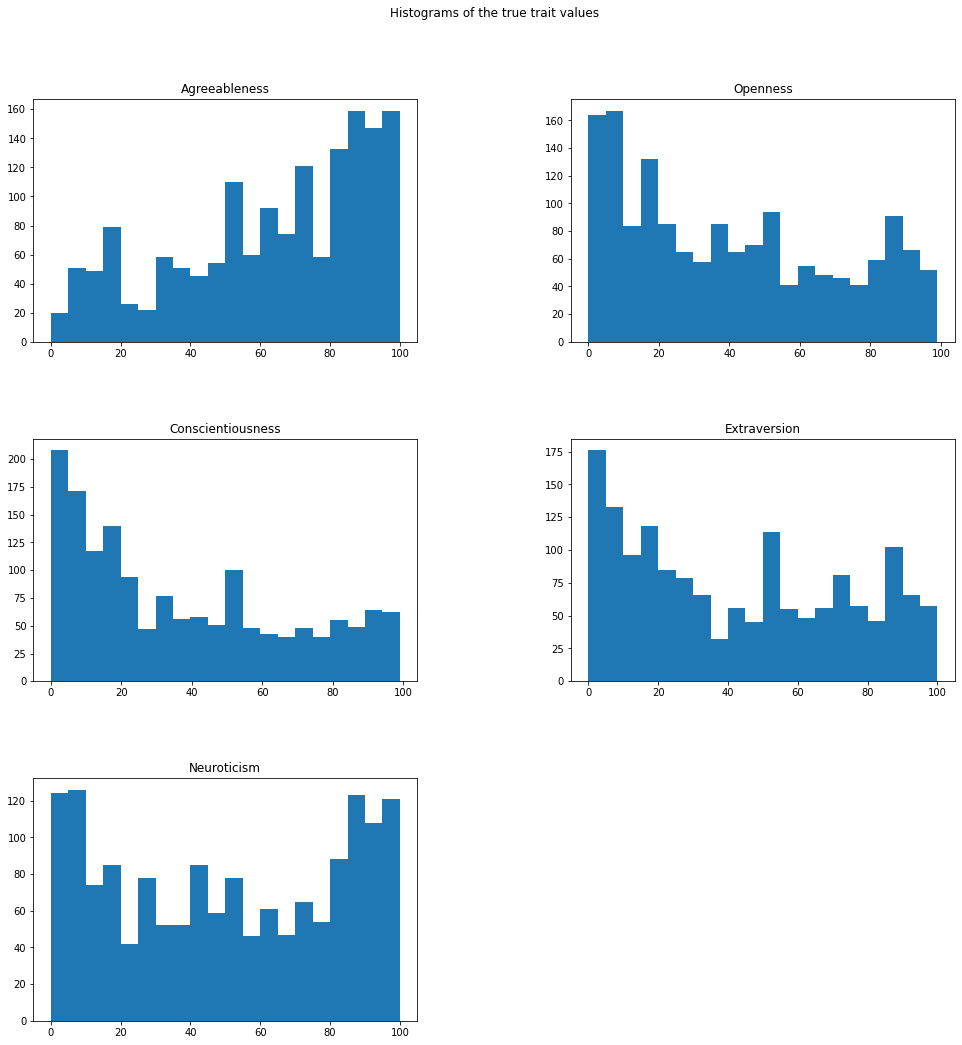

In [9]:
def all_hist_true(df):
    p = Path('/home/sophia/ma_py/Big5-NLP/results/')
    plt.figure(figsize = (16, 16))
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplot(3, 2, 1)
    plt.hist(df['trait', 'openness'], bins = 20)
    plt.title('Agreeableness')
    
    plt.subplot(3, 2, 2)
    plt.hist(df['trait', 'conscientiousness'], bins = 20)
    plt.title('Openness')
    
    plt.subplot(3, 2, 3)
    plt.hist(df['trait', 'extraversion'], bins = 20)
    plt.title('Conscientiousness')
    
    plt.subplot(3, 2, 4)
    plt.hist(df['trait', 'agreeableness'], bins = 20)
    plt.title('Extraversion')
    
    plt.subplot(3, 2, 5)
    plt.hist(df['trait', 'neuroticism'], bins = 20)
    plt.title('Neuroticism')
    
    plt.suptitle("Histograms of the true trait values")
    plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
    plt.savefig(Path(p, 'histogram_traits_plot.png'))
    plt.show()

all_hist_true(df)

## Check imbalance

In [11]:
traits = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']

def check_imbalance(df, traits):
    length = len(df)
    o = df['trait', 'big5_o']
    c = df['trait', 'big5_c']
    e = df['trait', 'big5_e']
    a = df['trait', 'big5_a']
    n = df['trait', 'big5_n']
    binarylst = [o, c, e, a, n]
    o5 = df['trait', 'big5_o_multi']
    c5 = df['trait', 'big5_c_multi']
    e5 = df['trait', 'big5_e_multi']
    a5 = df['trait', 'big5_a_multi']
    n5 = df['trait', 'big5_n_multi']
    multilst = [o5, c5, e5, a5, n5]
    
    result = []
    for trait in binarylst: 
        result.append(np.bincount(trait) / length)
    result5 = []
    for trait in multilst:
        result5.append(np.bincount(trait) / len(trait))
    
    print("Distribution of the true trait values in the classes (in %):\n")
    for i in range(len(traits)):
        print(traits[i], "\n\tBinary: ", result[i], "\n\t5 classes: ", result5[i], "\n")

    
check_imbalance(df, traits)

Distribution of the true trait values in the classes (in %):

openness 
	Binary:  [0.29017857 0.70982143] 
	5 classes:  [0.12691327 0.10012755 0.17155612 0.22002551 0.38137755] 

conscientiousness 
	Binary:  [0.62181122 0.37818878] 
	5 classes:  [0.34885204 0.18686224 0.17219388 0.12117347 0.17091837] 

extraversion 
	Binary:  [0.64987245 0.35012755] 
	5 classes:  [0.40561224 0.1747449  0.16390306 0.10905612 0.14668367] 

agreeableness 
	Binary:  [0.56505102 0.43494898] 
	5 classes:  [0.33354592 0.16709184 0.17219388 0.15433673 0.17283163] 

neuroticism 
	Binary:  [0.49553571 0.50446429] 
	5 classes:  [0.26084184 0.14285714 0.17091837 0.14477041 0.28061224] 

